# ENSEMBLED

Ask multiple people, make them choose between A and B ... N Say asked 20 people, choose the one which response has majority or most occurrence.

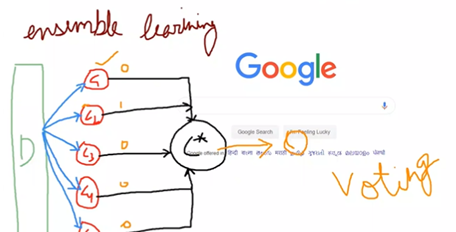

Train multiple classifiers, they can be of any type, like C1:SVM, C2:DT, C3:SVM, C4:LogReg etc. , they may be same type models but may have different parameters. They each produce results or outcomes based on the data they are given and the training they are given and the output of each is used for voting and most voted output is the considered final output.


These C1, C2…Cn classifiers are called “weak classifiers”, while C* is called “Strong Classifiers” having greater power, more precision and more accuracy.

Also Error is less of C* than weak classifiers.


Has two types : 

1. Bagging 

2. Boosting  

## Bagging

Train weak classifiers parallelly.  For n weak classifiers, divide data into n datasets and train each C on its set only, all parallelly.


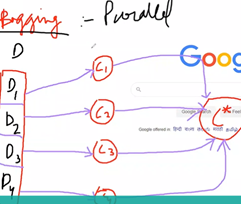

Examples of bagging :-

a. Random Forest	: All classifiers are decision trees. 

## Random Forest on Titanic Dataset

https://www.kaggle.com/hesh97/titanicdataset-traincsv

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 18.2MB/s]


In [ ]:
!unzip /content/titanicdataset-traincsv.zip

Archive:  /content/titanicdataset-traincsv.zip
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
l1 = ['PassengerId', 'Ticket', 'Cabin']
df.drop(l1, axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df["Name"].unique()

Designations are there Mr. Mrs. Master Miss

In [ ]:
temp = df["Name"].unique()
print(type(temp))

<class 'numpy.ndarray'>


In [ ]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [ ]:
st = []    # creating a set
j = 1
for i in temp:
  a = i.split()   # list of all words of each row
  for k in a :
    if '.' in k:
      st.append(k)
      break

st = np.array(st)
df["New_Name"] = st

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [ ]:
df["New_Name"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [ ]:
l2 = ["Name"]
df.drop(l2, axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [ ]:
# NAN
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_Name      0
dtype: int64

In [ ]:
emb = list(df["Embarked"].mode()) [0]
df["Age"].fillna (df["Age"].mean(), inplace=True)
df["Embarked"].fillna(emb, inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_Name    0
dtype: int64

In [ ]:
# Label Encoding embarked, new name, sex
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()
le_new_name = LabelEncoder()

In [ ]:
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_emb.fit_transform(df["Embarked"])
df["New_Name"] = le_new_name.fit_transform(df["New_Name"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


In [ ]:
df.shape

(891, 9)

In [ ]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
X.shape, Y.shape

((891, 8), (891,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.1)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((801, 8), (90, 8), (801,), (90,))



---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
clf1 = RandomForestClassifier(n_estimators=1, n_jobs=-1)
clf1.fit(xtrain, ytrain)
pred1 = clf1.predict(xtest)
print(clf1.score(xtrain, ytrain))
print(clf1.score(xtest, ytest))
print(confusion_matrix(pred1, ytest))
# OMG
# 0.9138576779026217
# 0.7666666666666667

0.9113607990012484
0.7666666666666667
[[50  9]
 [12 19]]


In [ ]:
clf2 = RandomForestClassifier(n_estimators=5, n_jobs=-1)
clf2.fit(xtrain, ytrain)
pred2 = clf2.predict(xtest)
print(clf2.score(xtrain, ytrain))
print(clf2.score(xtest, ytest))
print(confusion_matrix(pred2, ytest))

0.9575530586766542
0.8
[[53  9]
 [ 9 19]]


In [ ]:
clf3 = RandomForestClassifier(n_estimators=10, n_jobs=-1)
clf3.fit(xtrain, ytrain)
pred3 = clf3.predict(xtest)
print(clf3.score(xtrain, ytrain))
print(clf3.score(xtest, ytest))
print(confusion_matrix(pred3, ytest))

0.9700374531835206
0.8
[[54 10]
 [ 8 18]]


In [ ]:
clf4 = RandomForestClassifier(n_estimators=15, n_jobs=-1)
clf4.fit(xtrain, ytrain)
pred4 = clf4.predict(xtest)
print(clf4.score(xtrain, ytrain))
print(clf4.score(xtest, ytest))
print(confusion_matrix(pred4, ytest))

# this is overfitting now, so will prunate

0.978776529338327
0.7777777777777778
[[51  9]
 [11 19]]


In [ ]:
clf5 = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=2)
clf5.fit(xtrain, ytrain)
pred5 = clf5.predict(xtest)
print(clf5.score(xtrain, ytrain))
print(clf5.score(xtest, ytest))
print(confusion_matrix(pred5, ytest))
# not overfitting now atleast

0.8164794007490637
0.8333333333333334
[[58 11]
 [ 4 17]]


In [ ]:
clf6 = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=3)
clf6.fit(xtrain, ytrain)
pred6 = clf6.predict(xtest)
print(clf6.score(xtrain, ytrain))
print(clf6.score(xtest, ytest))
print(confusion_matrix(pred6, ytest))

0.8352059925093633
0.8444444444444444
[[57  9]
 [ 5 19]]
